# Notebook 44: Second wind model definitions & checks

In this notebook we define our second (fiducial) stellar wind model and perform consistency checks with test MESA runs.

In [3]:
# nb_id is used to identify this notebook's output files (i.e., figures) if there are any
# it should match the first two digits in the notebook's title
nb_id = 44

## Imports & Definitions

#### Imports

In [1]:
import sys
from pathlib import Path

import numpy as np
import mesa_reader as mr
import astropy.constants as ct
import astropy.units as u
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.lines import Line2D

sys.path.append('..')
from src.util import (savefig_base, get_model_folder_base, get_model_dict, history_plot, 
                      hr_diagram_tracks_base)

plt.style.use('./plotstyle.mplstyle')

/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


#### Constants

Set the grid to be loaded in `PROJECT_FOLDER`.

In [23]:
CODE_ROOT = Path('/mnt/home/ldesa/repos/cher')
DATA_ROOT = Path('/mnt/ceph/users/ldesa/mesa_che_grids')

PROJECT_FOLDER = DATA_ROOT/'sse_fiducial_b21_k18'
FIGURE_FOLDER = Path(f'./output/nb{nb_id}/figures')
FIGURE_FOLDER.mkdir(parents=True, exist_ok=True)

In [24]:
ZSUN = 0.014

In [25]:
def savefig(*args, **kwargs): 
    savefig_base(*args, nb_id=nb_id, figure_folder=FIGURE_FOLDER, **kwargs)
      
def get_model_folder(*args, **kwargs):
    return get_model_folder_base(PROJECT_FOLDER, *args, **kwargs)

## Data preparation

First we select the masses we want to load by means of their IDs.

In [39]:
model_ids = np.arange(0, 7, 1)
model_ids = np.array([f'{id:03d}' for id in model_ids])
model_folders = np.array([get_model_folder(id) for id in model_ids])
model_dicts = np.array([get_model_dict(folder) for folder in model_folders])
model_labels = np.array([f'${list(m.keys())[0]}\\,\\mathrm{{M}}_\\odot$' for m in model_dicts])

Found match /mnt/ceph/users/ldesa/mesa_che_grids/sse_fiducial_b21_k18/000_m20_test
Found match /mnt/ceph/users/ldesa/mesa_che_grids/sse_fiducial_b21_k18/001_m40_test
Found match /mnt/ceph/users/ldesa/mesa_che_grids/sse_fiducial_b21_k18/002_m60_test
Found match /mnt/ceph/users/ldesa/mesa_che_grids/sse_fiducial_b21_k18/003_m80_test
Found match /mnt/ceph/users/ldesa/mesa_che_grids/sse_fiducial_b21_k18/004_m100_test
Found match /mnt/ceph/users/ldesa/mesa_che_grids/sse_fiducial_b21_k18/005_m200_test
Found match /mnt/ceph/users/ldesa/mesa_che_grids/sse_fiducial_b21_k18/006_m300_test


We can then check the models that are available.

In [22]:
print('Available models:')
for i in range(len(model_ids)):
    print(f'\t{model_folders[i]}:')
    keys1 = list(model_dicts[i].keys())
    keys1 = np.array(keys1)[np.argsort([float(key) for key in keys1])]
    for key1 in keys1:
        keys2 = list(model_dicts[i][key1].keys())
        keys2 = np.array(keys2)[np.argsort([float(key) for key in keys2])]
        print(f'\t\t(m1/msun) {key1}:')
        for key2 in keys2:
            print(f'\t\t\t(p_orb/d) {key2}')

Available models:
	/mnt/ceph/users/ldesa/mesa_che_grids/sse_fiducial/000_test_m40:
		(m1/msun) 40.0:
			(p_orb/d) 0.35
			(p_orb/d) 0.40
			(p_orb/d) 0.45
			(p_orb/d) 0.50
			(p_orb/d) 0.55
			(p_orb/d) 0.60
			(p_orb/d) 0.65
			(p_orb/d) 0.70
			(p_orb/d) 0.75
			(p_orb/d) 0.80
			(p_orb/d) 0.85
			(p_orb/d) 0.90
			(p_orb/d) 1.00
			(p_orb/d) 1.10
			(p_orb/d) 1.20
			(p_orb/d) 1.30
			(p_orb/d) 1.40
			(p_orb/d) 1.50
			(p_orb/d) 1.60
			(p_orb/d) 1.70
			(p_orb/d) 1.80
			(p_orb/d) 1.90
			(p_orb/d) 2.00
			(p_orb/d) 2.10
			(p_orb/d) 2.20
			(p_orb/d) 2.30
			(p_orb/d) 2.40
			(p_orb/d) 2.50
			(p_orb/d) 2.60
			(p_orb/d) 2.80
			(p_orb/d) 3.00
			(p_orb/d) 3.20
			(p_orb/d) 3.40
			(p_orb/d) 3.60
			(p_orb/d) 3.80
			(p_orb/d) 4.00
	/mnt/ceph/users/ldesa/mesa_che_grids/sse_fiducial/001_test_m200:
		(m1/msun) 200.0:
			(p_orb/d) 0.35
			(p_orb/d) 0.40
			(p_orb/d) 0.45
			(p_orb/d) 0.50
			(p_orb/d) 0.55
			(p_orb/d) 0.60
			(p_orb/d) 0.65
			(p_orb/d) 0.70
			(p_orb/d) 0.75
			(

#### Data overview

We can plot a HR panel to get a sense of the data loaded and detect any immediate issues in the MESA runs.

In [26]:
def hr_diagram_tracks(*args, **kwargs):
    return hr_diagram_tracks_base(model_dicts, model_labels, *args, **kwargs)

In [40]:
model_labels

array(['$20.0\\,\\mathrm{M}_\\odot$', '$40.0\\,\\mathrm{M}_\\odot$',
       '$60.0\\,\\mathrm{M}_\\odot$', '$80.0\\,\\mathrm{M}_\\odot$',
       '$100.0\\,\\mathrm{M}_\\odot$', '$200.0\\,\\mathrm{M}_\\odot$',
       '$300.0\\,\\mathrm{M}_\\odot$'], dtype='<U25')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


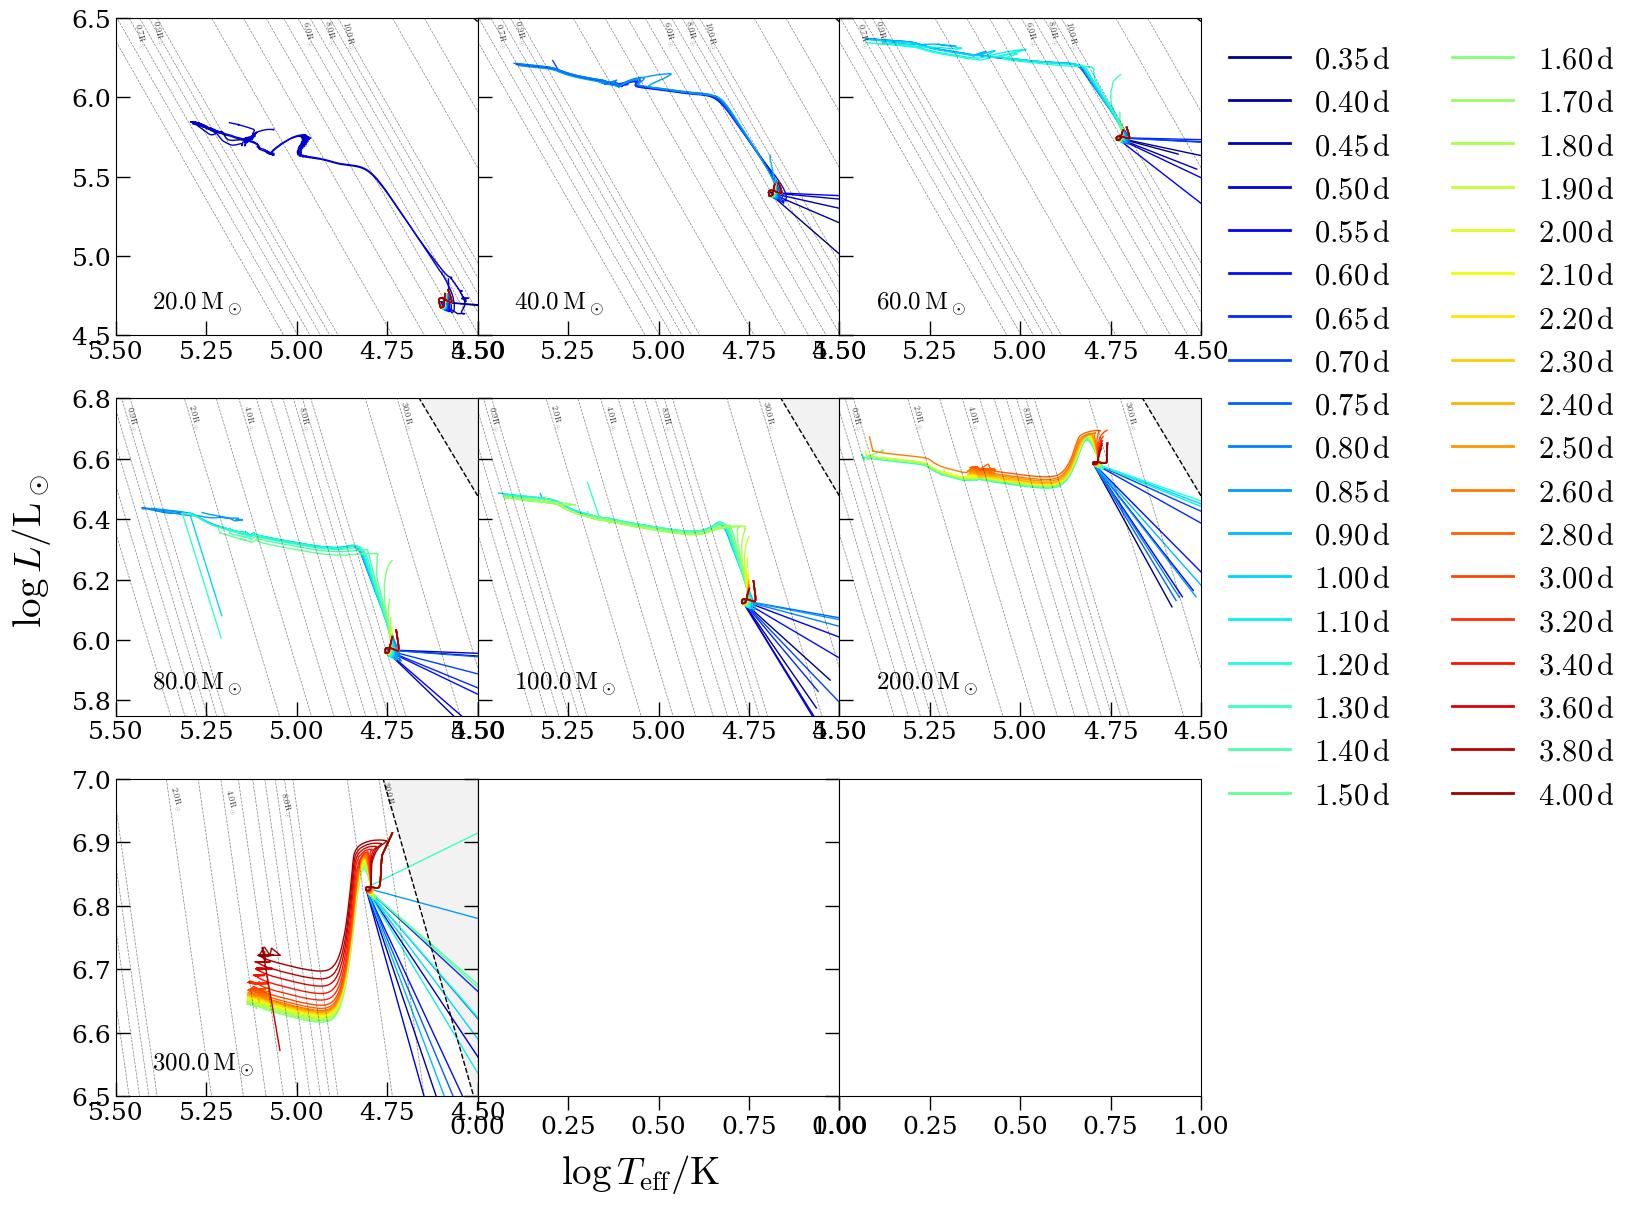

In [46]:
fig, axes = plt.subplots(3, 3, figsize=(14, 14), sharey='row')
fig.subplots_adjust(wspace=0)

mass_label_x = 0.1
mass_label_y = 0.1
mass_label_fontsize = 18

legend = False
labelx = False
labely = False

xlim = None
ylim = None

for i, (ax, label) in enumerate(zip(axes.flatten(), model_labels)):
    models_to_plot = [i]
    model_style_list = ['-']
    
    if i < 3:
        xlim = (5.5, 4.5)
        ylim = (4.5, 6.5)
    elif i < 6:
        xlim = (5.5, 4.5)
        ylim = (5.75, 6.8)
    else:
        xlim = (5.5, 4.5)
        ylim = (6.5, 7)
        
    if i == 2:
        legend = True
    else:
        legend = False
               
    ax = hr_diagram_tracks(
        ax=ax,
        models_to_plot=models_to_plot,
        model_style_list=model_style_list,
        xlim=xlim,
        ylim=ylim,
        legend=legend,
        labelx=labelx,
        labely=labely
    )
    
    ax.tick_params(direction='in')
    ax.text(mass_label_x, mass_label_y, label, va='center', ha='left', transform=ax.transAxes, fontsize=mass_label_fontsize)

fig.text(0.5, 0.07, '$\\log T_\\mathrm{eff}/\\mathrm{K}$', va='top', ha='center')
fig.text(0.08, 0.5, '$\\log L/\\mathrm{L}_\\odot$', rotation=90, va='center', ha='right')

savefig(fig, 'hr_allp_mass_comparison')


## Thin to thick winds transition in the Main Sequence